# Análise passo a passo com Jupyter Notebook
## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import seaborn as sns

## Gerando gráficos para a análise de dispersão

In [2]:
college = pd.read_csv('../go-to-college.csv')

Para uma análise adequada, convertemos as entradas de *String* para *int*

In [3]:

college['type_school'] = college['type_school'].map({'Academic': 0, 'Vocational': 1})
college['school_accreditation'] = college['school_accreditation'].map({'A': 0, 'B': 1})
college['gender'] = college['gender'].map({'Male': 0, 'Female': 1})
college['interest'] = college['interest'].map({'Not Interested': 0, 'Less Interested': 1, 'Interested': 2, 'Uncertain': 3, 'Very Interested': 4})
college['residence'] = college['residence'].map({'Urban': 0, 'Rural': 1})
college['parent_was_in_college'] = college['parent_was_in_college'].map({False: 0, True: 1})

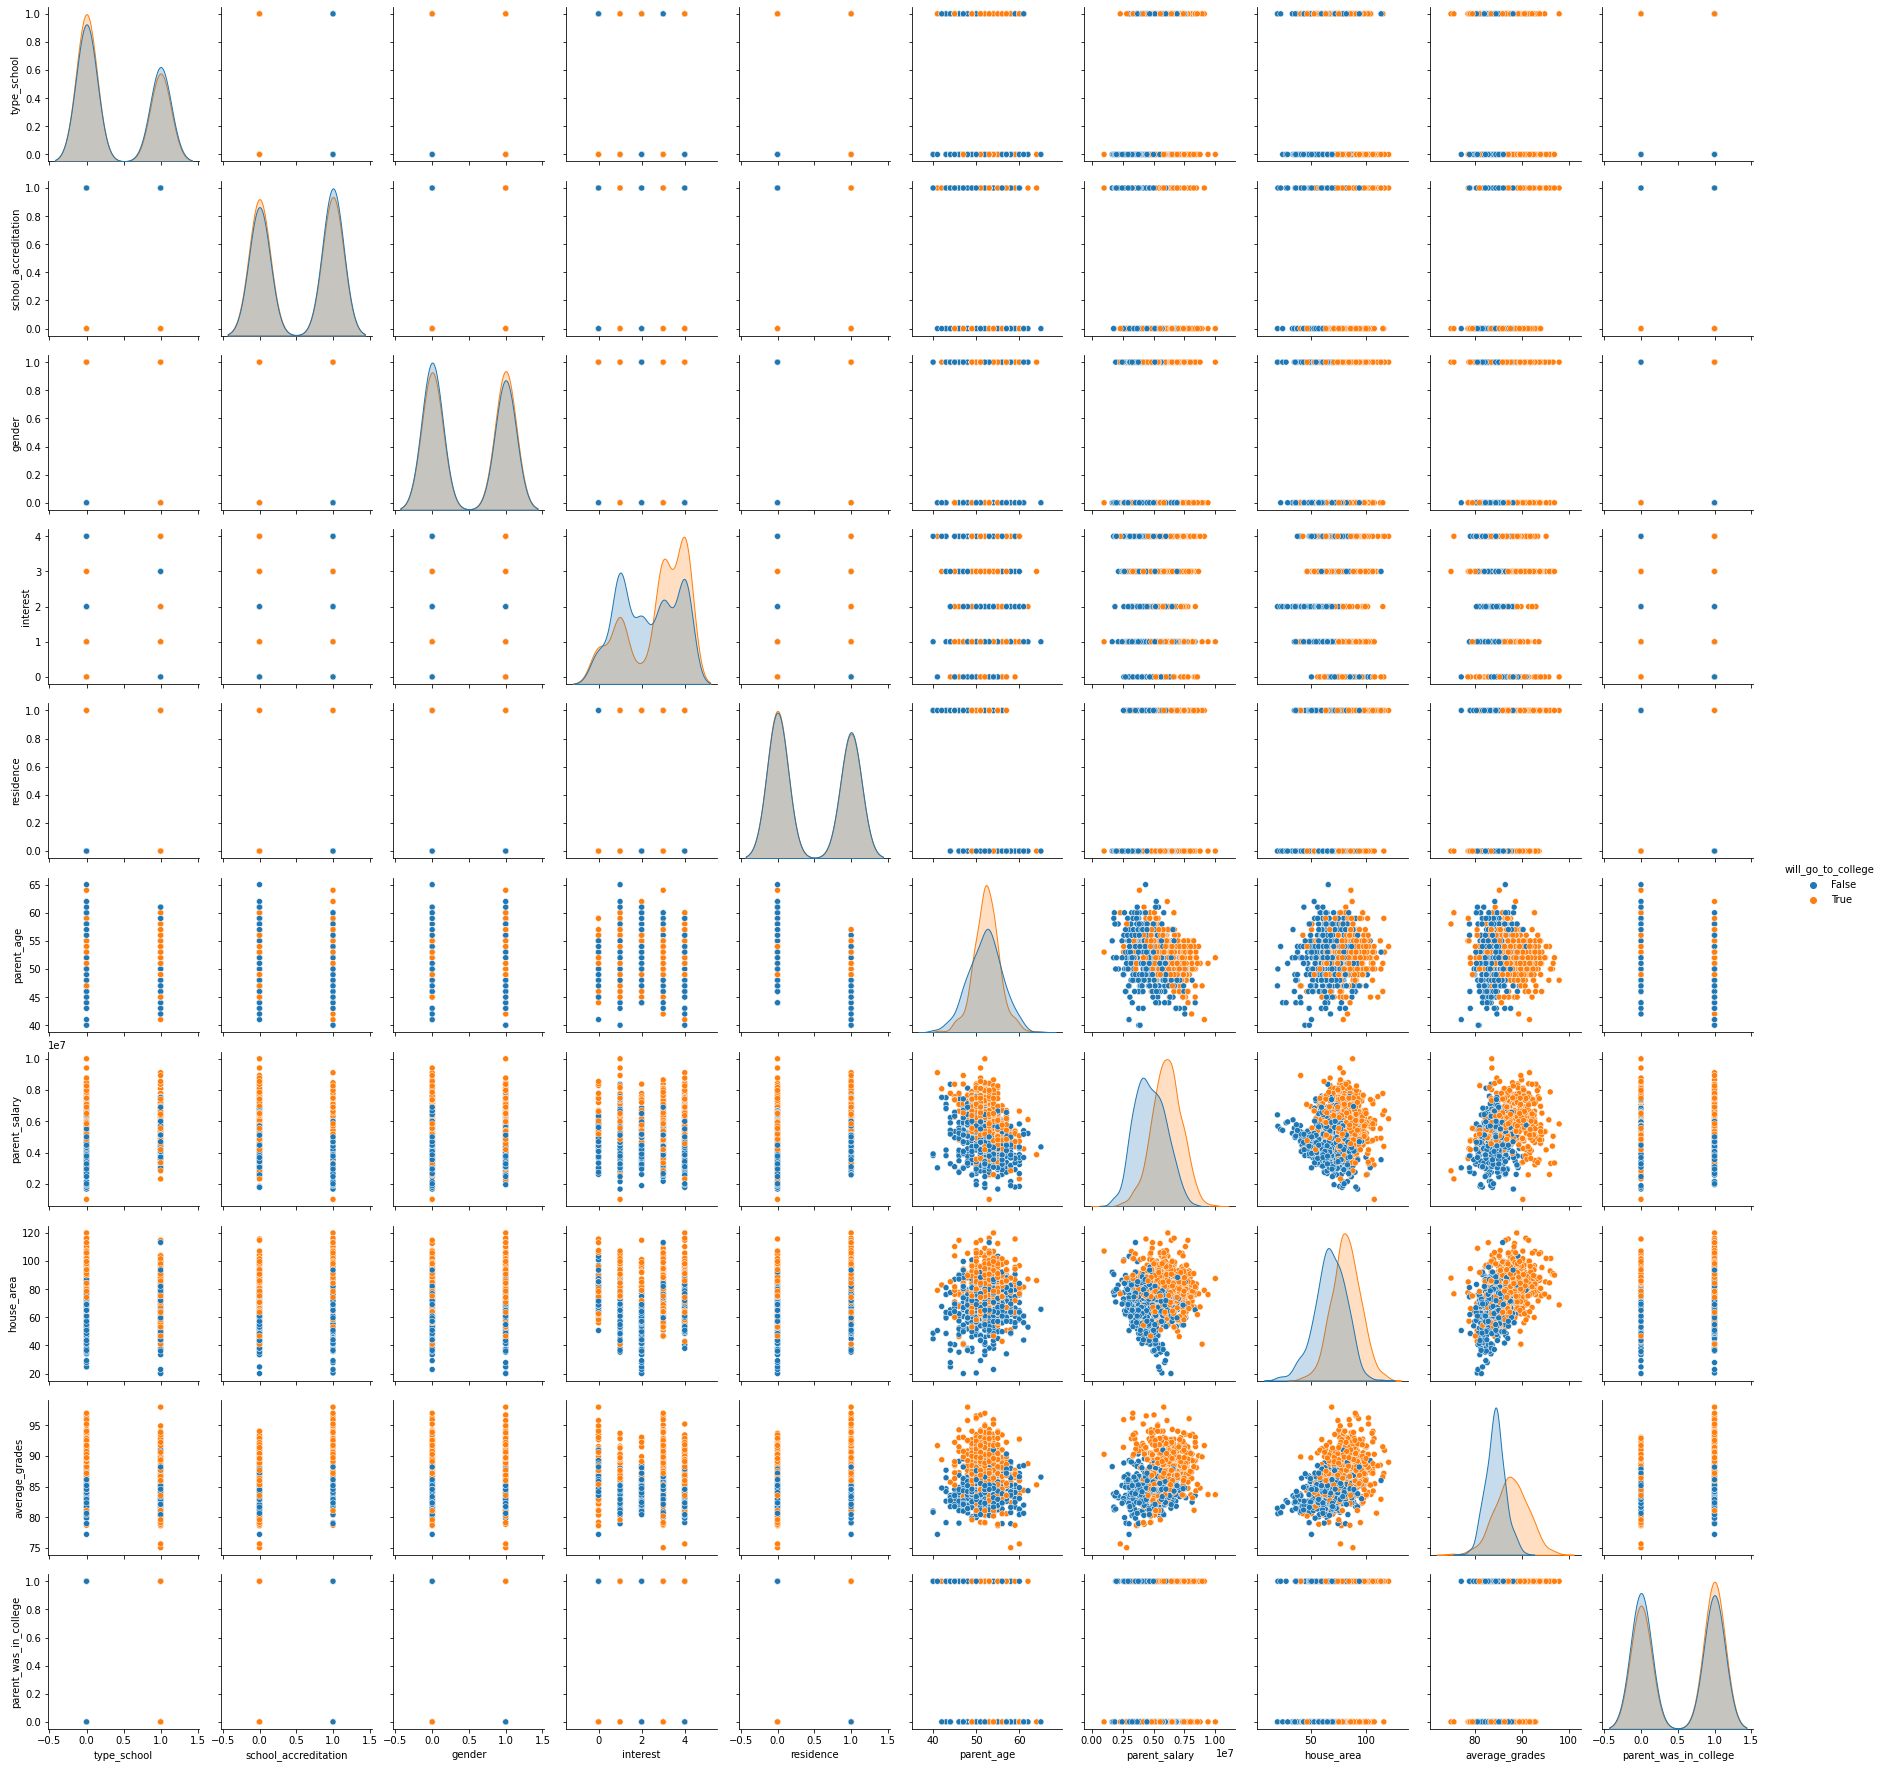

In [4]:
sns.pairplot(college, hue='will_go_to_college')

## Classificação com *K-Means*

Aqui separamos os dados e convertemos a a coluna *will_go_to_college* para valores numéricos

In [5]:
college['will_go_to_college'] = college['will_go_to_college'].map({False: 0, True: 1})
X = college.iloc[:, :-1].values
Y = college.iloc[:, -1].values
college.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,0,1,0,56,6950000,83.0,84.09,0,1
1,0,0,0,1,0,57,4410000,76.8,86.91,0,1
2,0,1,1,4,0,50,6500000,80.6,87.43,0,1
3,1,1,0,4,1,49,6600000,78.2,82.12,1,1
4,0,0,1,4,0,57,5250000,75.1,86.79,0,0


### Método do cotovelo
Ainda que se saiba o valor de *k* no dataset, uasaremos o método do cotovelo para saber quantos *clusters* poderiamos escolher caso a informação não estivesse disponível

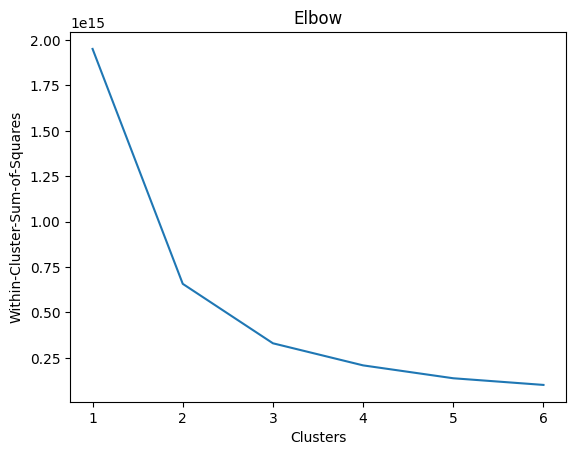

In [6]:
cotovelo = []
for i in range(1, 7):
    CKMeans = KMeans(n_clusters=i)
    CKMeans.fit(X)
    cotovelo.append(CKMeans.inertia_)
plt.plot(range(1, 7), cotovelo)
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()
 

O método do cotovelo sugere de 2 a 3 *clusters*, valor preciso sendo que *k* vale 2

### Realizando a previsão - *KMeans* com *k=2*

In [7]:
CKMeans = KMeans(n_clusters=2)
YPredict = CKMeans.fit_predict(X)
YResult = np.concatenate((YPredict.reshape(len(YPredict),1), Y.reshape(len(Y),1)),1)

### Taxa de acerto do algoritmo
Usamos a matriz de confusão para a análise da previsão de taxa de acerto para saber como o algoritmo se saiu na classificação

In [8]:
print('Teste do K-Means')
cm = confusion_matrix(Y, YPredict)
print(cm)
print(accuracy_score(Y, YPredict))

Teste do K-Means
[[171 329]
 [378 122]]
0.293
